## 极限学习机--Classification Example
训练部分，目的：求出$W_{out}$，随机初始化$W$和$b$
$$ H = sigmoid(Wx_{train}+b)\\ H^{+}=H\text{的广义逆}$$
$$ W_{out} = H^{+}{y_{train}} \text{(需要将 y 转成 one-hot)}$$
测试部分
$$ prediciton = sigmoid(Wx_{test}+b)W_{out}$$

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

需要标准化，不然会产生很大的极端值

In [3]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(X_train)
X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

导入 ELM 框架

In [4]:
from frames.ELM import ELMClassification

In [5]:
# hidden_nodes 隐藏层神经元个数
elm = ELMClassification(hidden_nodes=150)

In [6]:
elm.fit(X_train_standard, y_train)

/Users/zhengd/anaconda3/envs/wzd/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
elm.score(X_test_standard, y_test)

acc: 0.7333333333333333, precision: 0.7424242424242425, recall: 0.7305555555555555, f1: 0.7328587168404103


(0.7333333333333333,
 0.7424242424242425,
 0.7305555555555555,
 0.7328587168404103)

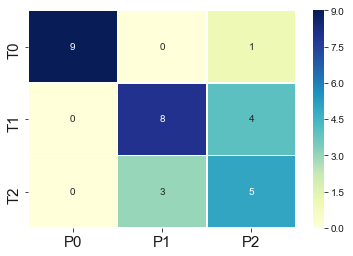

Save the picture successfully!


In [8]:
import os

save_path = 'Example_save_resultes/Classification/save_png'
if not os.path.exists(save_path):
    os.makedirs(save_path)
save_file = os.path.join(save_path, 'elm_clf.png')
elm.confusion_matrix_result(X_test_standard, y_test, save_file=save_file, is_show=True)

### 使用网格搜索，调用 GridSearch 里面的 ELMRegressionGridSearch 函数

the neuron numbers of hidden layer:  5
acc: 0.8666666666666667, precision: 0.8666666666666666, recall: 0.875, f1: 0.8653198653198654
the neuron numbers of hidden layer:  10
acc: 0.9333333333333333, precision: 0.9305555555555555, recall: 0.9305555555555555, f1: 0.9305555555555555
the neuron numbers of hidden layer:  15
acc: 0.9666666666666667, precision: 0.9629629629629629, recall: 0.9722222222222222, f1: 0.9658994032395567
the neuron numbers of hidden layer:  20
acc: 1.0, precision: 1.0, recall: 1.0, f1: 1.0
the neuron numbers of hidden layer:  25
acc: 0.9666666666666667, precision: 0.9743589743589745, recall: 0.9583333333333334, f1: 0.9644444444444445
the neuron numbers of hidden layer:  30
acc: 1.0, precision: 1.0, recall: 1.0, f1: 1.0
the neuron numbers of hidden layer:  35
acc: 1.0, precision: 1.0, recall: 1.0, f1: 1.0
the neuron numbers of hidden layer:  40
acc: 1.0, precision: 1.0, recall: 1.0, f1: 1.0
the neuron numbers of hidden layer:  45
acc: 1.0, precision: 1.0, recall: 1.0,

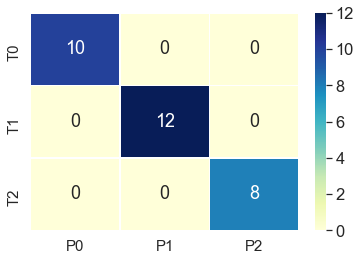

Save the picture successfully!


In [9]:
from frames.GridSearch import ElmClassificationGridSearch

# hidden_nodes 搜索上限
# gap 间隔多少神经元进行搜索，默认 10
# is_show 是否展示结果图
prediction = ElmClassificationGridSearch(X_train_standard, X_test_standard, y_train, y_test, hidden_nodes=200, gap=5, is_show=True) 

找到最好的 hidden number 是 20

In [12]:
elm2 = ELMClassification(hidden_nodes=20)
elm2.fit(X_train_standard, y_train)

In [13]:
elm2.score(X_test_standard, y_test)

acc: 0.9666666666666667, precision: 0.9743589743589745, recall: 0.9583333333333334, f1: 0.9644444444444445


(0.9666666666666667,
 0.9743589743589745,
 0.9583333333333334,
 0.9644444444444445)

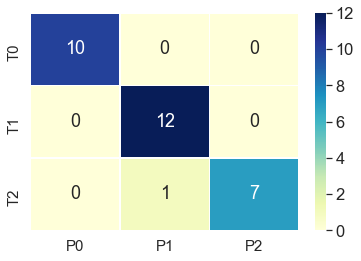

Save the picture successfully!


In [14]:
save_path = 'Example_save_resultes/Classification/save_png'
if not os.path.exists(save_path):
    os.makedirs(save_path)
save_file = os.path.join(save_path, 'elm_cfm2.png')
elm2.confusion_matrix_result(X_test_standard, y_test, save_file, is_show=True)

### 保存值

In [15]:
result_path = './Example_save_resultes/Classification/'
if not os.path.exists(result_path):
    os.makedirs(result_path)
results_file = os.path.join(result_path, 'elm_Classification.csv')
elm.save_result(is_standard=True, Dimensionality_reduction_method='None', save_path=results_file)

Save results success!
